In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

[Vídeo Sugerido](https://youtu.be/vvzTEbp9lrc)




[Imagem](https://betterexplained.com/wp-content/webp-express/webp-images/uploads/curl/curl-paddlewheel.png.webp)


$${\mathop{\rm rot}\nolimits} \vec A = \left( {\frac{{\partial {A_z}}}{{\partial y}} - \frac{{\partial {A_y}}}{{\partial z}}} \right)\vec i + \left( {\frac{{\partial {A_x}}}{{\partial z}} - \frac{{\partial {A_z}}}{{\partial x}}} \right)\vec j + \left( {\frac{{\partial {A_y}}}{{\partial x}} - \frac{{\partial {A_x}}}{{\partial y}}} \right)\vec k$$

In [ ]:
def curl(x,y,z,u,v,w):
    dx = x[0,:,0]
    dy = y[:,0,0]
    dz = z[0,0,:]

    # axis=[1,0,2] ==> 0:y  1:x 2:z
    dummy, dFx_dy, dFx_dz = np.gradient (u, dx, dy, dz, axis=[1,0,2])
    dFy_dx, dummy, dFy_dz = np.gradient (v, dx, dy, dz, axis=[1,0,2])
    dFz_dx, dFz_dy, dummy = np.gradient (w, dx, dy, dz, axis=[1,0,2])

    rot_x = dFz_dy - dFy_dz
    rot_y = dFx_dz - dFz_dx
    rot_z = dFy_dx - dFx_dy

    return rot_x, rot_y, rot_z

In [ ]:
largura = 5
comprimento = 10
profundidade = 4
x = np.linspace(0,largura,5);
y = np.linspace(0,comprimento,2);
z = np.linspace(-profundidade,0,2);

In [ ]:
X,Y,Z = np.meshgrid(x,y,z)
Vy = -X*(X-largura)

In [ ]:
Vx = np.zeros(Vy.shape)
print(Vx.shape)
print(Vy.shape)
print(X.shape)
print(Y.shape)
Vz = X * 0

(2, 5, 2)
(2, 5, 2)
(2, 5, 2)
(2, 5, 2)


In [ ]:
magV = np.sqrt( Vx**2 + Vy**2 + + Vz**2)

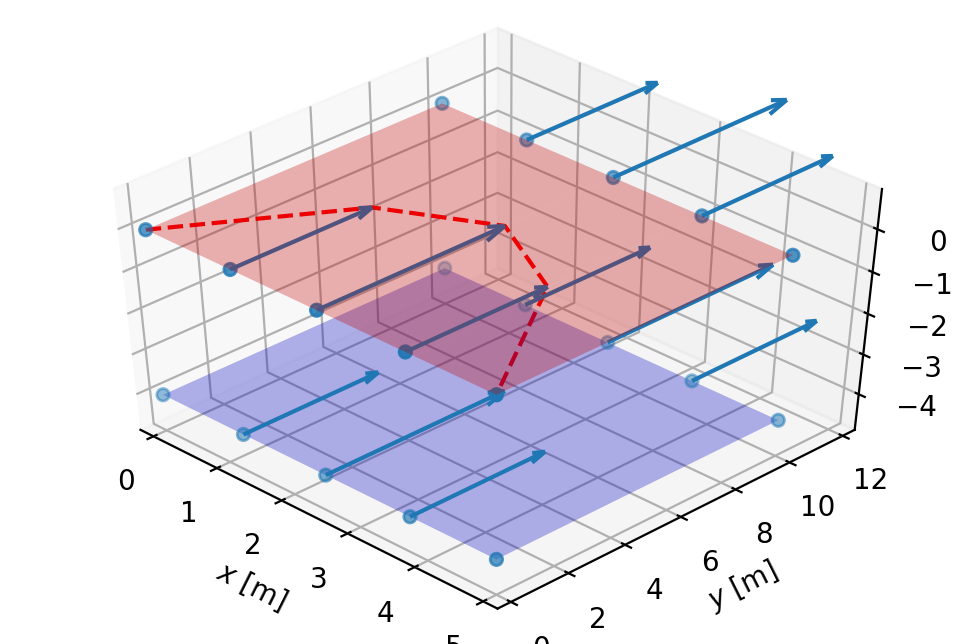

In [ ]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')
ax.quiver(X,Y,Z, Vx,Vy,Vz, arrow_length_ratio=0.1 )
ax.scatter(X,Y,Z)
ax.set_ylim(-comprimento*0.02,comprimento*1.22)
ax.set_xlim(-largura*0.02,largura*1.02)
ax.set_zlim(-profundidade*1.2,profundidade*0.2)
ax.plot(x,-x*(x-largura), x*0, ls='dashed',  color='red')
ax.grid()
ax.set_xlabel('$x$ [m]')
ax.set_ylabel('$y$ [m]')
ax.set_zlabel('$z$ [m]')
ax.view_init(45,-45)

xx, yy = np.meshgrid(x,y)
zz = xx*0
ax.plot_surface(xx, yy, zz, alpha = 0.3, color = 'red')
zz = zz - profundidade 
ax.plot_surface(xx, yy, zz, alpha = 0.3, color = 'blue')

fig.show()

In [ ]:
rx,ry,rz = curl(X,Y,Z, Vx,Vy,Vz)

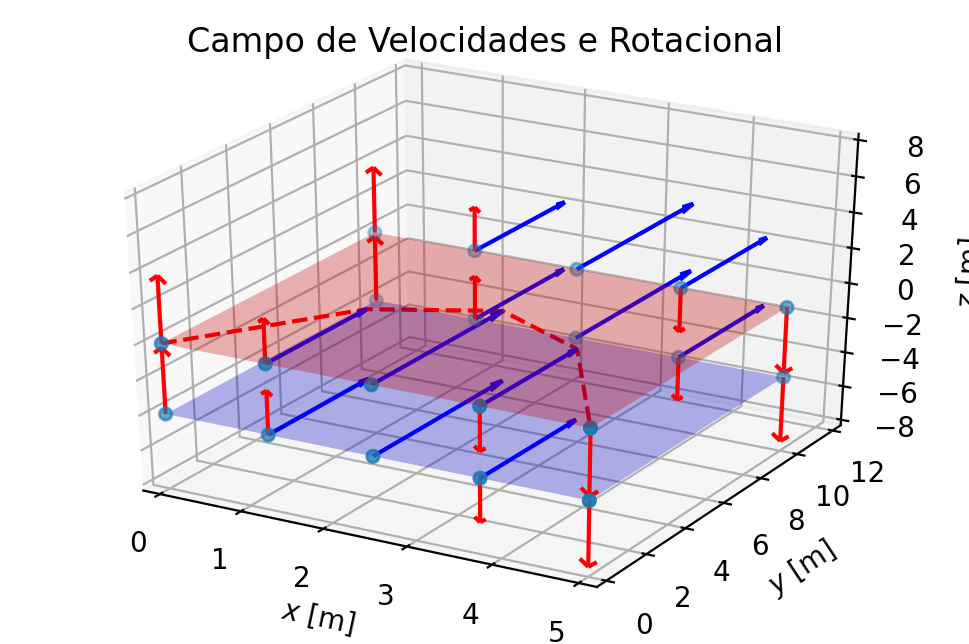

In [ ]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')
ax.quiver(X,Y,Z, Vx,Vy,Vz, arrow_length_ratio=0.1 ,  color='blue')
ax.quiver(X,Y,Z, rx,ry,rz, arrow_length_ratio=0.1 ,  color='red')
ax.scatter(X,Y,Z)
ax.set_ylim(-comprimento*0.02,comprimento*1.22)
ax.set_xlim(-largura*0.02,largura*1.02)
ax.set_zlim(-profundidade*2,profundidade*2)
ax.plot(x,-x*(x-largura), x*0, ls='dashed',  color='red')
ax.grid()
ax.set_xlabel('$x$ [m]')
ax.set_ylabel('$y$ [m]')
ax.set_zlabel('$z$ [m]')
ax.set_title('Campo de Velocidades e Rotacional')
ax.view_init(30,-60)


xx, yy = np.meshgrid(x,y)
zz = xx*0
ax.plot_surface(xx, yy, zz, alpha = 0.3, color = 'red')
zz = zz - profundidade
ax.plot_surface(xx, yy, zz, alpha = 0.3, color = 'blue')

fig.show()
